# 线性回归演示

# 知识点一：数据可视化探索线性关系

数据预览：
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


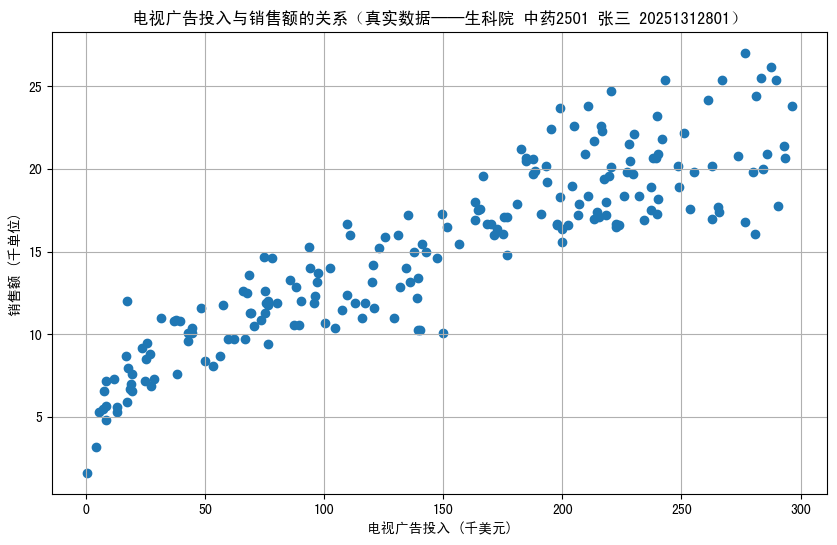

In [1]:
# 1. 导入我们需要的库
import pandas as pd
import matplotlib.pyplot as plt
# from sklearn.datasets import fetch_california_housing

# 设置matplotlib以正确显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 2. 加载数据
df = pd.read_csv('advertising.csv')

print("数据预览：")
print(df.head())

# 3. 选取一个特征和目标变量并绘制散点图
#我们的目标是通过可视化，直观地判断两个变量之间是否存在线性关系。
# 横坐标(X)是我们的特征（因变量），纵坐标(Y)是我们的目标（结果变量）。
plt.figure(figsize=(10, 6))
plt.scatter(df['TV'], df['Sales'], alpha=1.0)
plt.title('电视广告投入与销售额的关系（真实数据——生科院 中药2501 张三 20251312801）')
plt.xlabel('电视广告投入 (千美元)')
plt.ylabel('销售额 (千单位)')
plt.grid(True)
plt.show()


# 知识点二：模型训练与拟合

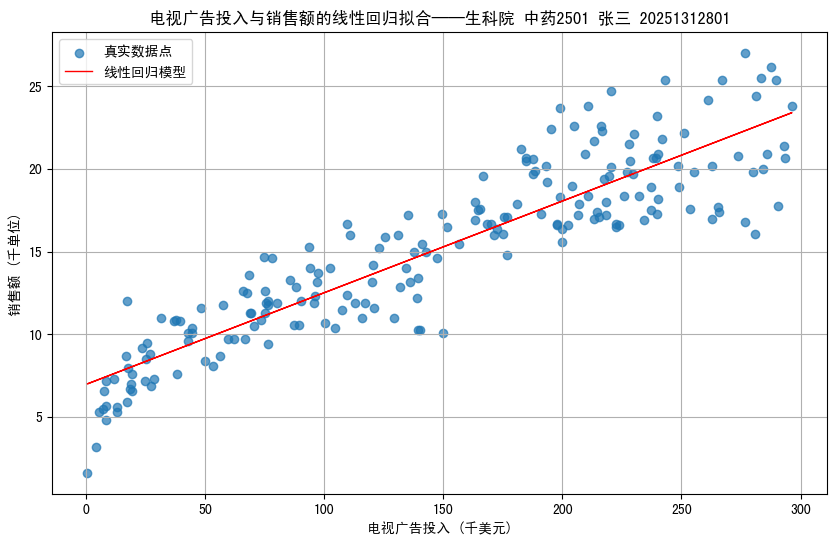

模型学习到的权重 w: 0.055
模型学习到的偏置 b: 6.975
所以，这条线的方程是: 销售额 = 0.055 * 电视广告投入 + 6.975


In [2]:
from sklearn.linear_model import LinearRegression

# 准备特征X和目标y
# scikit-learn要求特征X是一个二维数组，所以我们用两个中括号
X_demo = df[['TV']] 
y_demo = df['Sales']

# 1. 创建一个线性回归“机器人”
model_demo = LinearRegression()

# 2. 训练模型！
# 这行代码是核心。机器在背后默默地执行最小二乘法，
# 找到能让损失函数(MSE)最小的最佳w和b
model_demo.fit(X_demo, y_demo)

# 3. 可视化拟合的直线
plt.figure(figsize=(10, 6))
plt.scatter(X_demo, y_demo, alpha=0.7, label='真实数据点')
plt.plot(X_demo, model_demo.predict(X_demo), color='red', linewidth=1, label='线性回归模型')
plt.title('电视广告投入与销售额的线性回归拟合——生科院 中药2501 张三 20251312801')
plt.xlabel('电视广告投入 (千美元)')
plt.ylabel('销售额 (千单位)')
plt.legend()
plt.grid(True)
plt.show()

# 4. 查看模型学习到的参数
w = model_demo.coef_[0]
b = model_demo.intercept_
print(f"模型学习到的权重 w: {w:.3f}")
print(f"模型学习到的偏置 b: {b:.3f}")
print(f"所以，这条线的方程是: 销售额 = {w:.3f} * 电视广告投入 + {b:.3f}")

# --- 知识点三：模型评价 ---

In [3]:
from sklearn.metrics import mean_squared_error, r2_score

# 使用刚刚训练好的模型进行预测
y_pred_demo = model_demo.predict(X_demo)

# 计算MSE和R²
mse_demo = mean_squared_error(y_demo, y_pred_demo)
r2_demo = r2_score(y_demo, y_pred_demo)

print(f"对销售额预测模型的评价：")
print(f"均方误差 (MSE): {mse_demo:.2f}")
print(f"决定系数 (R²): {r2_demo:.2f}")

对销售额预测模型的评价：
均方误差 (MSE): 5.22
决定系数 (R²): 0.81


# --- 知识点四：可视化多特征平面 ---

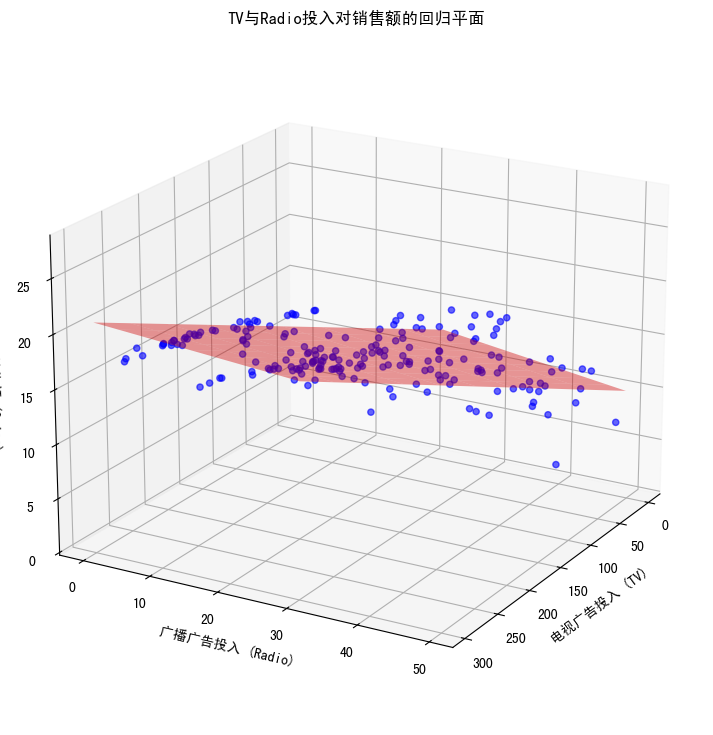

In [4]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# 1. 准备两个特征 (TV, Radio) 和目标 (Sales)
features_2d = ['TV', 'Radio']
X_2d = df[features_2d]
y_2d = df['Sales']

# 2. 训练一个只包含这两个特征的模型
model_2d = LinearRegression()
model_2d.fit(X_2d, y_2d)

# 3. 创建用于绘制平面的网格数据
# 为了绘制平面，我们需要在TV和Radio的取值范围内生成一个网格
x1_min, x1_max = X_2d['TV'].min(), X_2d['TV'].max()
x2_min, x2_max = X_2d['Radio'].min(), X_2d['Radio'].max()

x1_grid, x2_grid = np.meshgrid(np.linspace(x1_min, x1_max, 10),
                               np.linspace(x2_min, x2_max, 10))

# 在网格的每个点上进行预测，得到平面上点的高度(z值)
grid_points = np.c_[x1_grid.ravel(), x2_grid.ravel()]
# 为了让predict函数正常工作，我们需要提供一个DataFrame，并指定列名
grid_df = pd.DataFrame(grid_points, columns=['TV', 'Radio'])
z_pred = model_2d.predict(grid_df).reshape(x1_grid.shape)

# 4. 绘制3D图像
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# a. 绘制原始数据散点
ax.scatter(X_2d['TV'], X_2d['Radio'], y_2d, c='blue', marker='o', alpha=0.6, label='真实数据点')

# b. 绘制回归平面
ax.plot_surface(x1_grid, x2_grid, z_pred, color='red', alpha=0.4)
ax.view_init(elev=20, azim=30) # 您可以修改这里的数值
# elev: 指定上下观看的角度（elevation angle）。
# azim: 指定左右旋转的角度（azimuthal angle）。
# ax.view_init(elev=25, azim=-50)   这个视角会把原点放在右前方,完全相反的观察角度。
# ax.view_init(elev=15, azim=75)  这个视角几乎是沿着 "Radio" 轴在看，能非常清晰地展示 "TV" 投入和 "Sales" 之间的关系。

ax.set_xlabel('电视广告投入 (TV)')
ax.set_ylabel('广播广告投入 (Radio)')
ax.set_zlabel('销售额 (Sales)')
ax.set_title('TV与Radio投入对销售额的回归平面')
plt.show()

# --- 知识点五：多特征模型与特征缩放 ---

In [5]:
from sklearn.preprocessing import StandardScaler

# 0. 准备所有特征和目标
features = ['TV', 'Radio', 'Newspaper']
X_multi = df[features]
y_multi = df['Sales']

# 1. (对比) 在未缩放的数据上训练模型
model_unscaled = LinearRegression()
model_unscaled.fit(X_multi, y_multi)

print("--- 未进行特征缩放 ---")
print("模型权重 (w) 分别对应 [TV, Radio, Newspaper]:")
print(model_unscaled.coef_)
print("模型的线性方程截距为:")
print(model_unscaled.intercept_)


# 2. 进行特征缩放
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_multi)

# 3. 在缩放后的数据上训练模型
model_scaled = LinearRegression()
model_scaled.fit(X_scaled, y_multi)

print("\n--- 进行特征缩放后 ---")
print("模型权重 (w) 分别对应 [TV, Radio, Newspaper]:")
print(model_scaled.coef_)
print("模型的线性方程截距为:")
print(model_scaled.intercept_)


--- 未进行特征缩放 ---
模型权重 (w) 分别对应 [TV, Radio, Newspaper]:
[0.05444578 0.10700123 0.00033566]
模型的线性方程截距为:
4.625124078808652

--- 进行特征缩放后 ---
模型权重 (w) 分别对应 [TV, Radio, Newspaper]:
[4.66270025 1.58465027 0.00729187]
模型的线性方程截距为:
15.130500000000001
